In [2]:
!pip install prophet
!pip install yfinance

In [3]:
import yfinance as yf
import pandas as pd
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = yf.download("AAPL", start="2017-01-01", end="2022-01-01")
data.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2017-01-03,26.862429,26.904058,26.540959,26.781483,115127600
2017-01-04,26.832355,26.945681,26.769912,26.793039,84472400
2017-01-05,26.968809,27.026628,26.783790,26.809230,88774400
2017-01-06,27.269466,27.327285,26.936432,27.008126,127007600
2017-01-09,27.519245,27.621006,27.276409,27.278720,134247600


In [5]:
data.reset_index(inplace=True)

df = data[['Date', 'Close']]
df.columns = ['ds', 'y']

df.head()

,ds,y
0,2017-01-03,26.862429
1,2017-01-04,26.832355
2,2017-01-05,26.968809
3,2017-01-06,27.269466
4,2017-01-09,27.519245


In [6]:
print(df.isnull().sum())
df.dropna(inplace=True)

ds    0
y     0
dtype: int64


<ipython-input-6-fca8a7430411>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [7]:
model = Prophet()

model.fit(df)

future = model.make_future_dataframe(periods=365)

forecast = model.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzesmr3ki/s3ut5130.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpzesmr3ki/mo2za6a6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51158', 'data', 'file=/tmp/tmpzesmr3ki/s3ut5130.json', 'init=/tmp/tmpzesmr3ki/mo2za6a6.json', 'output', 'file=/tmp/tmpzesmr3ki/prophet_modela5t2_y3w/prophet_model-20250302124316.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
12:43:16 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
12:43:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
1619,2022-12-27,199.112186,172.632794,227.519473
1620,2022-12-28,199.063599,171.898777,226.117558
1621,2022-12-29,198.894194,171.386256,225.312817
1622,2022-12-30,198.635996,171.931399,225.801259
1623,2022-12-31,199.112118,171.508185,225.890355


In [8]:
merged = pd.merge(df, forecast[['ds', 'yhat']], on='ds', how='left')

mae = mean_absolute_error(merged['y'], merged['yhat'])
rmse = np.sqrt(mean_squared_error(merged['y'], merged['yhat']))

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Absolute Error (MAE): 3.3705196058793256
Root Mean Squared Error (RMSE): 4.4588097418852115


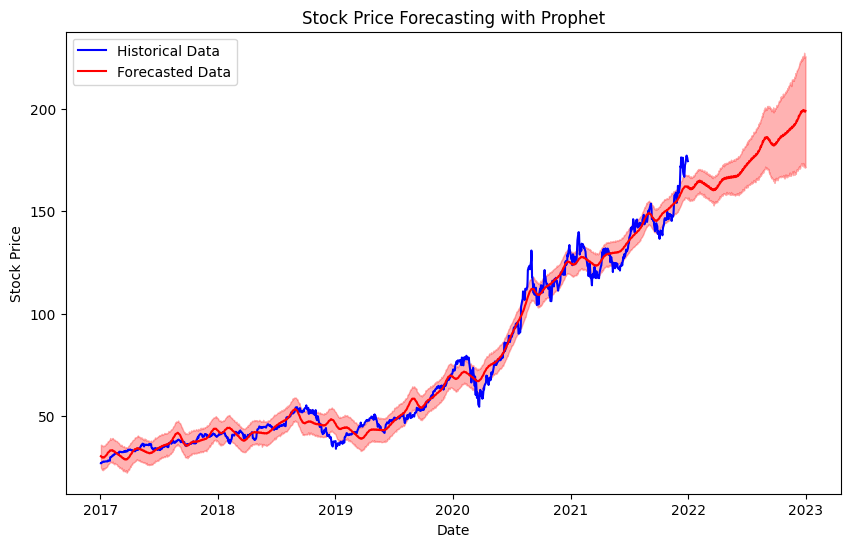

In [9]:
plt.figure(figsize=(10,6))

plt.plot(df['ds'], df['y'], label='Historical Data', color='blue')

plt.plot(forecast['ds'], forecast['yhat'], label='Forecasted Data', color='red')

plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='red', alpha=0.3)

plt.title('Stock Price Forecasting with Prophet')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

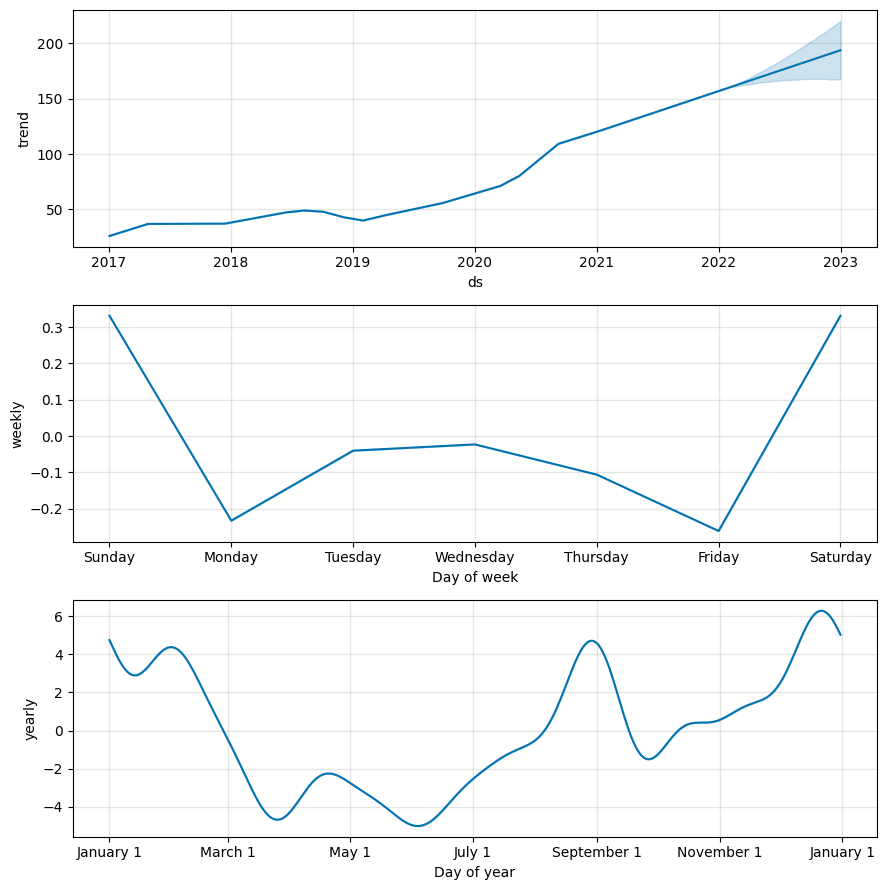

In [10]:
model.plot_components(forecast)
plt.show()